# Домашняя работа 9. Деревья решений. (32 балла)

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиций деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'../../data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("data/winequality-red.csv", delimiter=';')

In [17]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [18]:
data.columns = data.columns.str.replace('"', '').str.strip()

print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


C:\Temp\ipykernel_12304\4079414451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


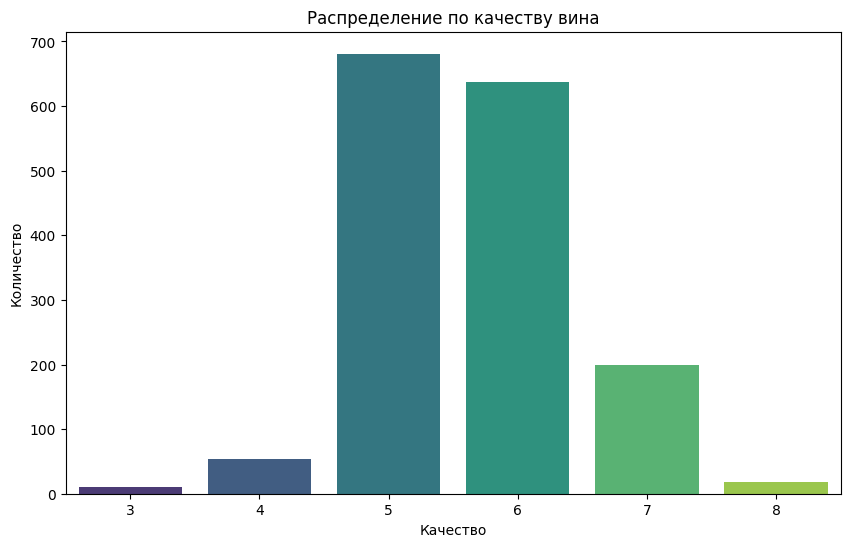

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Распределение по качеству вина')
plt.xlabel('Качество')
plt.ylabel('Количество')
plt.show()

In [20]:
X = data.drop(columns=['quality'])
y = data['quality']

X.head(), y.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  
 0      9.4  
 1      9.8  
 2      9.8  
 3      9.8  
 4

### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier 
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов. 

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [21]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

X = data.drop(columns=['quality'])
y = data['quality']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

In [22]:
# 1. KNeighborsClassifier с 10 соседями
knn = KNeighborsClassifier(n_neighbors=10)
score_knn = cross_val_score(knn, X, y, cv=kf, scoring='accuracy').mean()
results['KNeighborsClassifier'] = score_knn

In [23]:
# 2. KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
score_knn_scaled = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy').mean()
results['KNeighborsClassifier with Scaling'] = score_knn_scaled


In [24]:
# 3. RidgeClassifier
ridge = RidgeClassifier(random_state=42)
score_ridge = cross_val_score(ridge, X, y, cv=kf, scoring='accuracy').mean()
results['RidgeClassifier'] = score_ridge

In [25]:
# 4. DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
score_dt = cross_val_score(dt, X, y, cv=kf, scoring='accuracy').mean()
results['DecisionTreeClassifier'] = score_dt

In [27]:
# 5. BaggingClassifier с 100 деревьями
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
score_bagging = cross_val_score(bagging, X, y, cv=kf, scoring='accuracy').mean()
results['BaggingClassifier'] = score_bagging

In [29]:
# 6. BaggingClassifier с 100 деревьями и случайным выбором половины признаков для каждого дерева
bagging_random = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), 
                                  n_estimators=100, 
                                  max_features=0.5, 
                                  random_state=42)
score_bagging_random = cross_val_score(bagging_random, X, y, cv=kf, scoring='accuracy').mean()
results['BaggingClassifier with Random Features'] = score_bagging_random

In [30]:
# 7. RandomForestClassifier с 100 деревьями
rf = RandomForestClassifier(n_estimators=100, random_state=42)
score_rf = cross_val_score(rf, X, y, cv=kf, scoring='accuracy').mean()
results['RandomForestClassifier'] = score_rf

In [31]:
results

{'KNeighborsClassifier': 0.5122198275862069,
 'KNeighborsClassifier with Scaling': 0.5797531347962382,
 'RidgeClassifier': 0.5835384012539185,
 'DecisionTreeClassifier': 0.6178957680250783,
 'BaggingClassifier': 0.697966300940439,
 'BaggingClassifier with Random Features': 0.6948354231974921,
 'RandomForestClassifier': 0.7017143416927899}

### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без
- почему масштабирование не важно для деревьев решений
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

Разница в качестве у KNeighborsClassifier с масштабированием и без:
KNeighborsClassifier чувствителен к масштабированию данных, так как основан на расчете расстояний между точками. Без масштабирования признаки с большими значениями (например, alcohol или sulphates) могут доминировать, что ухудшает производительность. Масштабирование, например, с помощью StandardScaler, приводит все признаки к одинаковому масштабу, что делает алгоритм более сбалансированным.

Масштабирование не важно для деревьев решений:
Деревья решений основаны на разбиении данных на основе пороговых значений признаков. Масштабирование данных не влияет на эти пороги, так как важно только относительное значение признаков, а не их масштабы. Поэтому масштабирование не влияет на производительность деревьев решений.

Бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех:
Ограничение числа признаков, доступных для каждого дерева, увеличивает разнообразие деревьев в ансамбле. Это снижает переобучение, поскольку каждое дерево строится на разных подмножествах признаков, что делает итоговую модель более устойчивой и улучшает её обобщающую способность.

Модель с наибольшим отклонением от среднего качества:
Вероятно, это KNeighborsClassifier без масштабирования. Алгоритм сильно зависит от масштаба признаков, и без масштабирования его производительность может значительно колебаться в зависимости от доминирования признаков с большими значениями.

## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятся делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

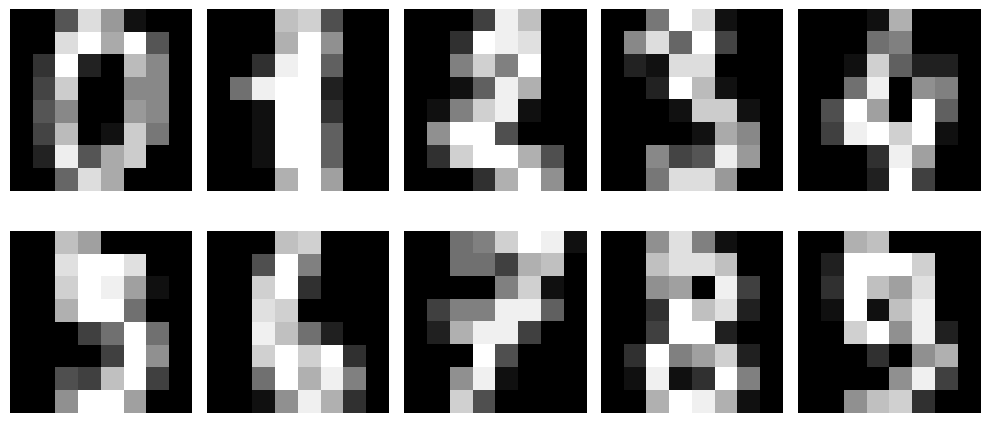

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

images = digits.images[:10]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')  # Убираем оси

plt.tight_layout()
plt.show()

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [34]:
n_features = X.shape[1]
sqrt_features = int(np.sqrt(n_features))

classifiers = {
    'DecisionTree': DecisionTreeClassifier(),
    'Bagging (100 trees)': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100),
    'Bagging (100 trees, max_features=sqrt(N))': BaggingClassifier(
        estimator=DecisionTreeClassifier(), n_estimators=100, max_features=sqrt_features
    ),
    'Bagging (100 trees, tree max_features=sqrt(N))': BaggingClassifier(
        estimator=DecisionTreeClassifier(max_features=sqrt_features), n_estimators=100
    ),
    'RandomForest (100 trees)': RandomForestClassifier(n_estimators=100)
}

for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print(f"{name}: Mean accuracy = {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

DecisionTree: Mean accuracy = 0.4684 (+/- 0.0510)
Bagging (100 trees): Mean accuracy = 0.5635 (+/- 0.0432)
Bagging (100 trees, max_features=sqrt(N)): Mean accuracy = 0.5603 (+/- 0.0672)
Bagging (100 trees, tree max_features=sqrt(N)): Mean accuracy = 0.5797 (+/- 0.0491)
RandomForest (100 trees): Mean accuracy = 0.5822 (+/- 0.0625)


### 2.3 В чём разница? (3 балла)

Ответье на вопрос: 

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

![](https://i.ytimg.com/vi/_5GWMIAHc08/hqdefault.jpg)

Ограничение max_features на уровне ансамбля (BaggingClassifier) фиксирует одну подвыборку признаков для всех деревьев, снижая их разнообразие и точность. Ограничение на уровне дерева (DecisionTreeClassifier) дает новую подвыборку признаков для каждого разбиения, увеличивая разнообразие деревьев и улучшая предсказания, как в случайном лесу.

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

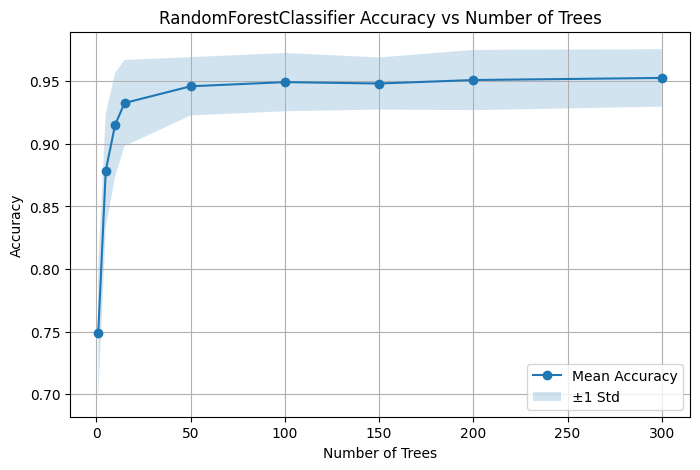

Best number of trees: 300, Accuracy: 0.9527


In [35]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

digits = load_digits()
X, y = digits.data, digits.target

n_estimators_list = [1, 5, 10, 15, 50, 100, 150, 200, 300]
mean_scores = []
std_scores = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, mean_scores, marker='o', label='Mean Accuracy')
plt.fill_between(n_estimators_list, 
                 np.array(mean_scores) - np.array(std_scores), 
                 np.array(mean_scores) + np.array(std_scores), 
                 alpha=0.2, label='±1 Std')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('RandomForestClassifier Accuracy vs Number of Trees')
plt.grid(True)
plt.legend()
plt.show()

best_n = n_estimators_list[np.argmax(mean_scores)]
best_score = max(mean_scores)
print(f"Best number of trees: {best_n}, Accuracy: {best_score:.4f}")

### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

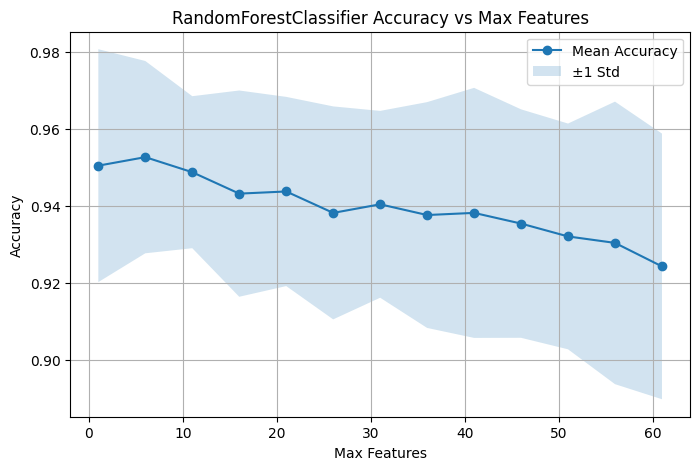

Best max_features: 6, Accuracy: 0.9527


In [36]:
digits = load_digits()
X, y = digits.data, digits.target

max_features_list = list(range(1, 65, 5))
mean_scores = []
std_scores = []

for max_f in max_features_list:
    rf = RandomForestClassifier(n_estimators=100, max_features=max_f, random_state=42)
    scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

plt.figure(figsize=(8, 5))
plt.plot(max_features_list, mean_scores, marker='o', label='Mean Accuracy')
plt.fill_between(max_features_list, 
                 np.array(mean_scores) - np.array(std_scores), 
                 np.array(mean_scores) + np.array(std_scores), 
                 alpha=0.2, label='±1 Std')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('RandomForestClassifier Accuracy vs Max Features')
plt.grid(True)
plt.legend()
plt.show()

# Нахождение лучшего max_features
best_max_f = max_features_list[np.argmax(mean_scores)]
best_score = max(mean_scores)
print(f"Best max_features: {best_max_f}, Accuracy: {best_score:.4f}")

### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?
- Как зависит качество предсказания в дереве в зависимости от max_features?
- Почему качество зависит от max_features?
- Как глубина деревьев влияет на качество случайного леса?

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)